In [131]:
%pylab inline
import pandas, pickle

tableau20 = pickle.load(open("tableau20.colors","rb"))

rcParams["lines.linewidth"] = 3
rcParams["axes.grid"] = True
rcParams["figure.figsize"] = (12,8)
rcParams["axes.color_cycle"] = tableau20

Populating the interactive namespace from numpy and matplotlib


In [274]:
df = pandas.read_csv("trades_2014_07_30.csv")
df["price"] = map(lambda x: float(x), df["price"])
df["size"] = map(lambda x: float(x), df["size"])
df["time"] = map(lambda x: float(x[11:-1][:2])*3600.0 + float(x[11:-1][3:5])*60.0 + float(x[11:-1][6:]), df["time"])
df["side_numerical"] = map(lambda x: 1 if x == "sell" else -1, df["side"])
df["uptick"] = (df["price"] > df["price"].shift(1))
df["downtick"] = (df["price"] < df["price"].shift(1))
df["uptick"] = map(lambda x: 1.0 if x else 0.0, df["uptick"])
df["downtick"] = map(lambda x: -1.0 if x else 0.0, df["downtick"])
df["deltaprice"] = df["price"] - df["price"].shift(1)
df["deltatime"] = df["time"] - df["time"].shift(1)
df["deltatime"][0] = 0.0

In [301]:
print "autocorrelation of pct change in price: %f" % df["price"].pct_change()[1:].autocorr()
idx = df["side"].loc[df["side"] == "buy"].index + 1
afterbuy = df["side"].iloc[idx[idx < df["side"].count()]]
print "downticks followed by upticks: %f%%" % (100. * afterbuy.loc[afterbuy == "sell"].count() / afterbuy.count())
idx = df["side"].loc[df["side"] == "sell"].index + 1
aftersell = df["side"].iloc[idx[idx < df["side"].count()]]
print "upticks followed by downticks: %f%%" % (100. * aftersell.loc[aftersell == "buy"].count() / aftersell.count())

autocorrelation of pct change in price: -0.033630
downticks followed by upticks: 24.285714%
upticks followed by downticks: 7.173913%


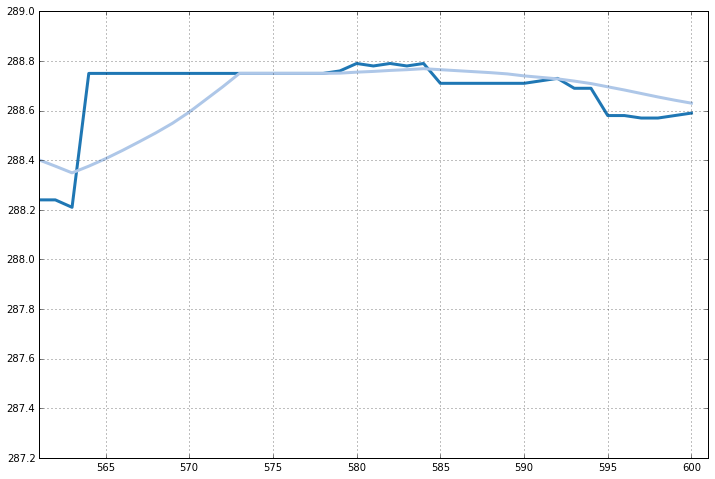

In [292]:
plot(df["price"])
#plot(df["price"], "o");
plot(pandas.stats.moments.rolling_mean(df["price"],window=10));
xlim(df["price"].count()-40,df["price"].count());

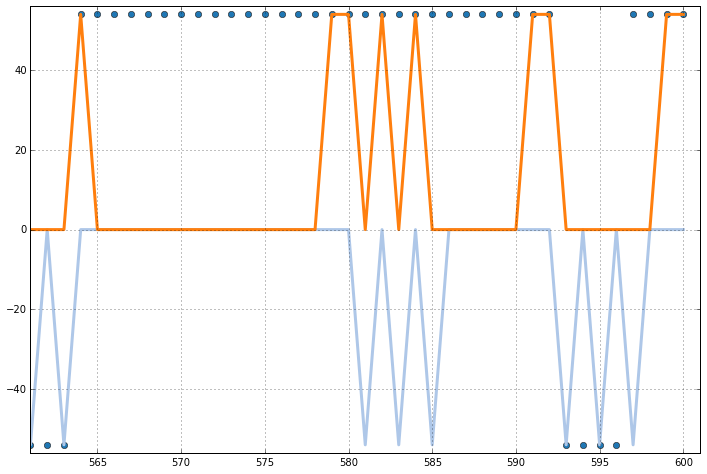

In [287]:
scaled = 100. * df["deltaprice"]
m = abs(scaled).max()
plot(df["side_numerical"]*m, "o")
#plot(scaled)
#plot(df["downtick"] * m)
#plot(df["uptick"] * m)
ylim(-1*m-2,m+2);
plot(df["downtick"]*m)
plot(df["uptick"]*m)
xlim(df["price"].count()-40,df["price"].count());

size mean:    0.932042
size std dev: 2.427212


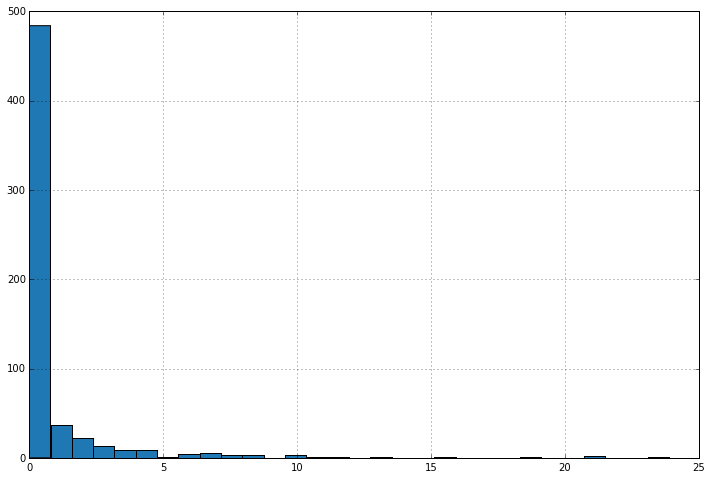

In [288]:
hist(df["size"], bins=30);
print "size mean:    %f" % df["size"].mean()
print "size std dev: %f" % df["size"].std()

size mean:    9.457604
size std dev: 18.729939


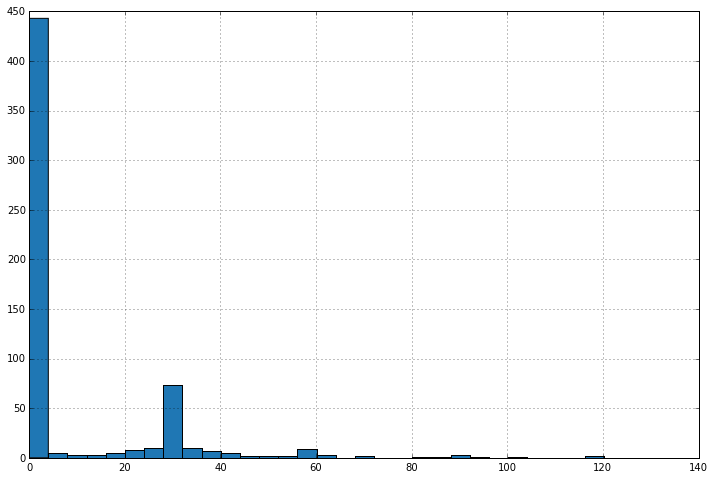

In [289]:
hist(df["deltatime"], bins=30);
print "size mean:    %f" % df["deltatime"].mean()
print "size std dev: %f" % df["deltatime"].std()